In [15]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pandas as pd

# Instalar o pacote devtools, se ainda não estiver instalado
robjects.r('install.packages("devtools")')

# Carregar o pacote devtools
robjects.r('library(devtools)')

# Instalar o pacote mananciais
robjects.r('devtools::install_github("beatrizmilz/mananciais")')

# Carregar o pacote mananciais
robjects.r('library(mananciais)')

# Chamar a função dados_mananciais
robjects.r('mananciais <- mananciais::dados_mananciais()')

# Obter o dataframe em Python
mananciais_py = robjects.r('mananciais')

# Converter o dataframe R para um dataframe Pandas
mananciais_df = pandas2ri.rpy2py(mananciais_py)

# Converter a coluna 'data' para datetime
mananciais_df['data'] = pd.to_datetime(mananciais_df['data'], unit='D', origin='1970-01-01')

# Exemplo de filtragem para datas maiores que 2013
filtro = mananciais_df['data'] > '2013-01-01'
dados_apos_2013 = mananciais_df[filtro]

# Imprimir os dados
print(dados_apos_2013.head(5))

In [36]:
# Filter data for 2021 and 2022
df_2021 = df[df['ano'] == 2021]
df_2022 = df[df['ano'] == 2022]

# Example usage, printing the first 5 rows of each filtered DataFrame
print("Data for 2021:")
print(df_2021.head())

print("\nData for 2022:")
print(df_2022.head())

# Group by 'sistema' and calculate the average 'volume_porcentagem' for each year
# avg_2021 = df_2021.groupby('sistema')['volume_porcentagem'].mean()
# avg_2022 = df_2022.groupby('sistema')['volume_porcentagem'].mean()

# Merge the two DataFrames on the 'sistema' column
# comparison_df = pd.merge(avg_2021, avg_2022, on='sistema', suffixes=('_2021', '_2022'))

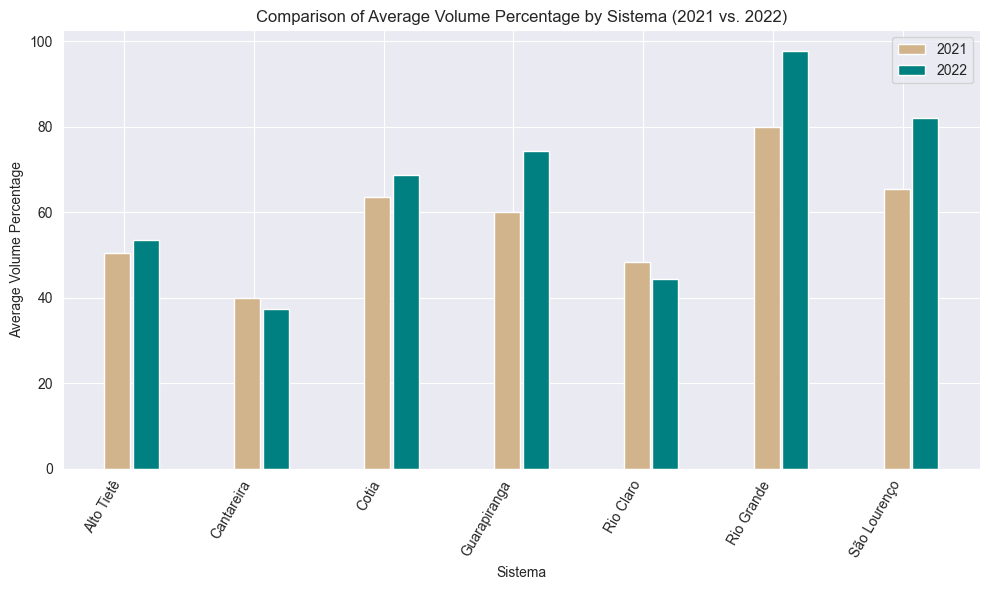

In [50]:
plt.figure(figsize=(10, 6))  # Increased figure size for better spacing
sns.set_style('darkgrid')

# Increase the bar width and adjust the separation
bar_width = 0.2  # Adjust the bar width
bar_positions_2021 = range(len(comparison_df))
bar_positions_2022 = [pos + 1.1 * bar_width for pos in bar_positions_2021]  # Increase the separation

# Plot bars for 2021
plt.bar(bar_positions_2021, comparison_df['volume_porcentagem_2021'], width=bar_width, color='tan', label='2021')

# Plot bars for 2022
plt.bar(bar_positions_2022, comparison_df['volume_porcentagem_2022'], width=bar_width, color='teal', label='2022')

# Set x-axis ticks and labels with increased rotation
plt.xticks([pos + 0.25 * bar_width for pos in bar_positions_2021], comparison_df.index, rotation=60, ha='right')

plt.title('Comparison of Average Volume Percentage by Sistema (2021 vs. 2022)')
plt.xlabel('Sistema')
plt.ylabel('Average Volume Percentage')
plt.legend()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()